In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [50]:
pd.options.display.max_columns = None

In [51]:
df_listing = pd.read_csv('Data/listings_details.csv')
df_reviews = pd.read_csv('Data/reviews_Details.csv')
df_scrape = pd.read_csv('Data/Airbnb_Description.csv')
df_listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2265,https://www.airbnb.com/rooms/2265,20210210181232,2021-02-12,Zen-East in the Heart of Austin (monthly rental),Zen East is situated in a vibrant & diverse mu...,NaN,https://a0.muscache.com/pictures/4740524/63f82...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27750,-97.71398,Entire house,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Free parking on premises"", ""Hair dryer"", ""Pa...",$200.00,7,180,7.0,7.0,180.0,180.0,7.0,180.0,NaN,t,13,13,42,131,2021-02-12,24,0,0,2009-03-17,2019-03-16,93.0,9.0,10.0,10.0,10.0,8.0,9.0,NaN,f,3,2,1,0,0.17
1,5245,https://www.airbnb.com/rooms/5245,20210210181232,2021-02-12,"Eco friendly, Colorful, Clean, Cozy monthly share",Situated in a vibrant & diverse multicultural ...,NaN,https://a0.muscache.com/pictures/5167505/b33b5...,2466,https://www.airbnb.com/users/show/2466,Paddy,2008-08-23,"Austin, Texas, United States",I am a long time resident of Austin. I earned ...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/2466/profile_...,https://a0.muscache.com/im/users/2466/profile_...,East Downtown,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,NaN,78702,NaN,30.27577,-97.71379,Private room in house,Private room,2,NaN,1 private bath,1.0,2.0,"[""Free parking on premises"", ""Hair dryer"", ""Br...",$114.00,30,60,30.0,30.0,60.0,60.0,30.0,60.0,NaN,t,0,0,0,0,2021-02-12,9,0,0,2009-03-19,2018-03-14,91.0,10.0,8.0,10.0,9.0,10.0,9.0,NaN,f,3,2,1,0,0.06


In [52]:
df_listing.shape

(10272, 74)

## Performing EDA Analysis

In [53]:
# Removing unnecessary columns
columns_to_remove = ['scrape_id','last_scraped','neighbourhood_group_cleansed','calendar_updated','license','bathrooms',
                     'picture_url','host_has_profile_pic','host_name','host_url','host_thumbnail_url','name',
                     'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
                     'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','host_picture_url',
                     'number_of_reviews_l30d','number_of_reviews_ltm','calendar_last_scraped',
                     'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                     'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month',
                     'availability_30','availability_60','availability_90','availability_365','number_of_reviews',
                     'neighbourhood','instant_bookable','host_about',
                     'latitude','longitude'] 
df_listing.drop(columns_to_remove,axis=1,inplace=True)

In [54]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10272 non-null  int64  
 1   listing_url                  10272 non-null  object 
 2   description                  10064 non-null  object 
 3   neighborhood_overview        6545 non-null   object 
 4   host_id                      10272 non-null  int64  
 5   host_since                   10267 non-null  object 
 6   host_location                10247 non-null  object 
 7   host_response_time           6073 non-null   object 
 8   host_response_rate           6073 non-null   object 
 9   host_acceptance_rate         6850 non-null   object 
 10  host_is_superhost            10267 non-null  object 
 11  host_neighbourhood           8363 non-null   object 
 12  host_listings_count          10267 non-null  float64
 13  host_total_listi

### Renaming Columns

In [55]:
df_listing = df_listing.rename(columns={'neighbourhood_cleansed': 'zip_code'})



### Converting the columns data format

In [56]:
df_listing.first_review = pd.to_datetime(df_listing.first_review)
df_listing.last_review = pd.to_datetime(df_listing.last_review)
df_listing.host_since = pd.to_datetime(df_listing.host_since)

df_listing["Timeframe"] = (df_listing.last_review - df_listing.first_review).dt.days
df_listing.drop(['first_review','last_review'],axis=1,inplace=True)

In [57]:
# Filtering the prices and remove the highest ones due to SXSW festival
df_listing.price = df_listing.price.replace('[\$,]','',regex=True).astype(float)
df_listing = df_listing[df_listing.price<5200]

In [58]:
# Converting categories to numbers
df_listing.loc[:,'host_is_superhost'] = df_listing.host_is_superhost.map({'t':1,'f':0})




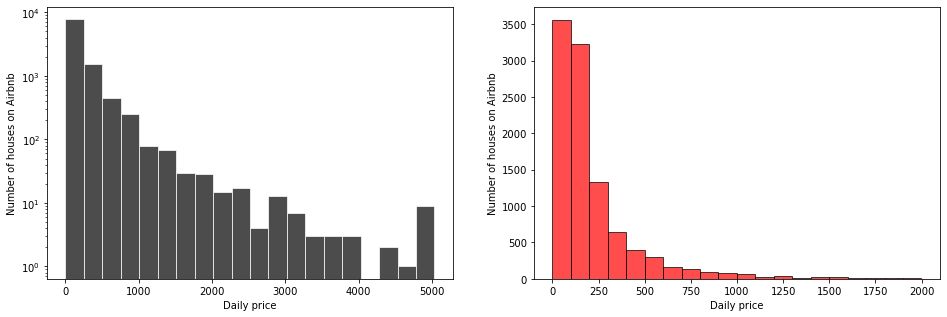

In [59]:
fig,axs = plt.subplots(1,2,figsize=(16,5))
axs[0].hist(df_listing.price,bins=20,color='k',alpha=0.7,edgecolor='w')
axs[0].set_yscale('log');
axs[0].set_xlabel('Daily price');
axs[0].set_ylabel('Number of houses on Airbnb');
axs[0].grid(b='None');
axs[0].grid(None);
axs[1].hist(df_listing.price[df_listing.price<2000],bins=20,color='r',alpha=0.7,edgecolor='k');
axs[1].set_xlabel('Daily price');
axs[1].set_ylabel('Number of houses on Airbnb');

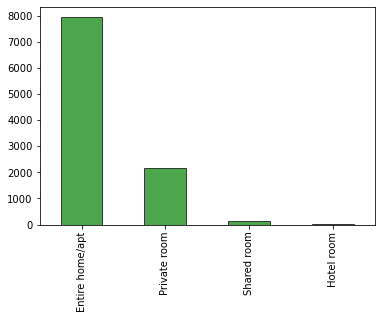

In [60]:
fig,ax = plt.subplots(figsize=(6,4))
ax = df_listing.room_type.value_counts().plot(kind='bar',color='g',alpha=0.7,edgecolor='k');

In [61]:
#df_listing.info()

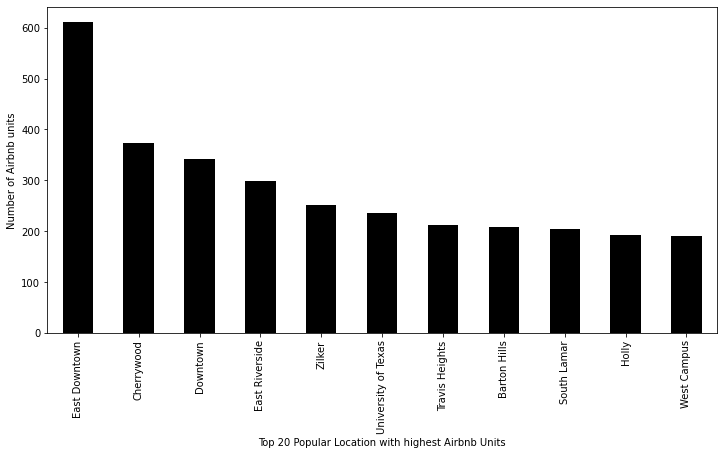

In [62]:
fig,ax = plt.subplots(figsize=(12,6));
ax = df_listing.host_neighbourhood.value_counts()[:11].plot.bar(color='k');
ax.set_ylabel('Number of Airbnb units');
ax.set_xlabel('Top 20 Popular Location with highest Airbnb Units');

In [63]:
dict_amenities = dict()
for lst in df_listing.amenities:
    for word in lst.replace('[','').replace('"','').replace(']','').replace(' ','').split(','):
        if word not in dict_amenities:
            dict_amenities[word] = 1
        else:
            dict_amenities[word] += 1

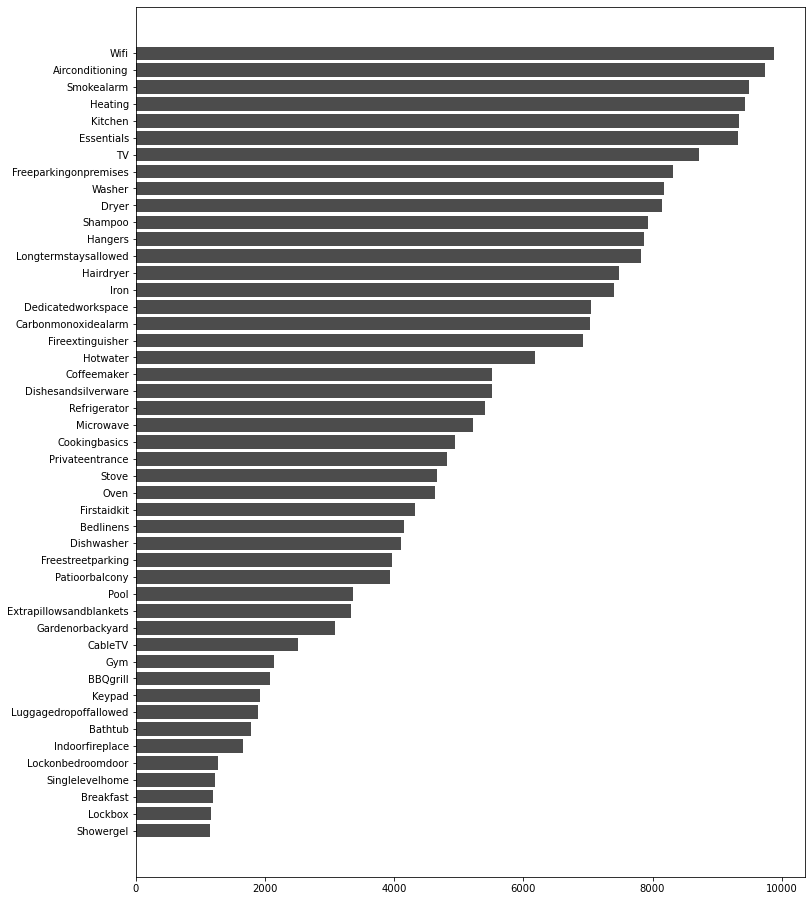

In [64]:
filtered_dict = {k:v for k,v in dict_amenities.items() if v>1000}
filtered_dict = {k:v for k,v in sorted(filtered_dict.items(),key=lambda item:item[1])}

fig,ax = plt.subplots(figsize=(12,16))
a= list(filtered_dict.keys())
b= filtered_dict.values()
# ax.bar(a,b)
plt.barh(a,b,color='k',alpha=0.7);

In [65]:
## Features to keep
# bbqgrill, gym, pool,private_entrance

# Most expensive house
# https://www.airbnb.com/rooms/46081394/photos?guests=1&adults=1
# https://www.airbnb.com/luxury/listing/36868497?source_impression_id=p3_1616965432_%2BtiLPpKVsNjbcXS8&guests=1&adults=1&check_in=2021-04-07&check_out=2021-04-10
#https://www.airbnb.com/rooms/46081476/photos?source_impression_id=p3_1616965591_2THtdQLDDHYaRava

Text(0.5, 0, 'Host Locations')

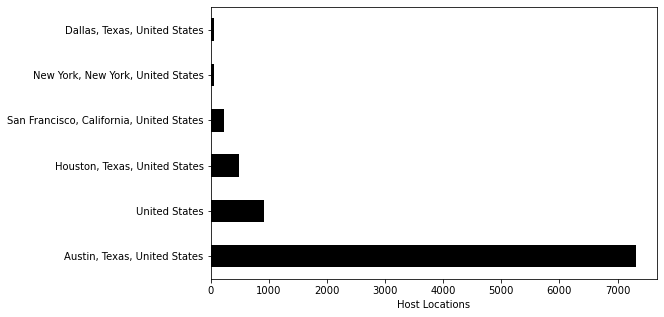

In [96]:
df_listing.host_location = df_listing.host_location.str.replace('US','United States')
fig,ax = plt.subplots(figsize=(8,5))
ax = df_listing.host_location.value_counts().head(6).plot(kind='barh',color='k')
ax.set_xlabel('Host Locations')

Text(0, 0.5, 'Median Price per Night')

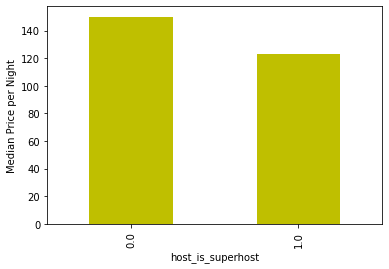

In [67]:
fig,ax = plt.subplots(figsize=(6,4));
df_listing.groupby('host_is_superhost').price.median().plot(kind='bar',color='y');
ax.set_ylabel('Median Price per Night')

In [79]:
df_listing.bedrooms = df_listing.bedrooms.fillna(0)

In [80]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10255 entries, 0 to 10271
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10255 non-null  int64         
 1   listing_url                  10255 non-null  object        
 2   description                  10052 non-null  object        
 3   neighborhood_overview        6539 non-null   object        
 4   host_id                      10255 non-null  int64         
 5   host_since                   10250 non-null  datetime64[ns]
 6   host_location                10230 non-null  object        
 7   host_response_time           6059 non-null   object        
 8   host_response_rate           6059 non-null   object        
 9   host_acceptance_rate         6837 non-null   object        
 10  host_is_superhost            10250 non-null  float64       
 11  host_neighbourhood           8348 non-nul

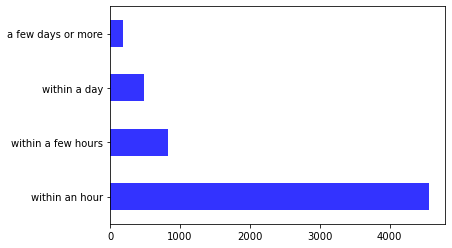

In [98]:
df_listing.host_response_time.value_counts().plot(kind='barh',color='b',alpha=0.8);

In [106]:
columns_to_remove2 = ['host_response_time','host_response_rate','host_neighbourhood'] 
df_listing.drop(columns_to_remove2,axis=1,inplace=True)

In [107]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10255 entries, 0 to 10271
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10255 non-null  int64         
 1   listing_url                  10255 non-null  object        
 2   description                  10052 non-null  object        
 3   neighborhood_overview        6539 non-null   object        
 4   host_id                      10255 non-null  int64         
 5   host_since                   10250 non-null  datetime64[ns]
 6   host_location                10230 non-null  object        
 7   host_acceptance_rate         6837 non-null   object        
 8   host_is_superhost            10250 non-null  float64       
 9   host_neighbourhood           8348 non-null   object        
 10  host_listings_count          10250 non-null  float64       
 11  host_total_listings_count    10250 non-nu